In [2]:
import matplotlib.pyplot as plt
import numpy as np

(array([  1.,   0.,   1.,   2.,   1.,   5.,   9.,  12.,  17.,  39.,  40.,
         61.,  62.,  65.,  78.,  89.,  82., 100.,  81.,  57.,  49.,  48.,
         29.,  20.,  25.,  10.,   5.,   5.,   6.,   2.]),
 array([-5.55202124, -5.33295383, -5.11388642, -4.89481901, -4.6757516 ,
        -4.45668419, -4.23761678, -4.01854937, -3.79948196, -3.58041455,
        -3.36134714, -3.14227973, -2.92321232, -2.70414491, -2.4850775 ,
        -2.26601009, -2.04694268, -1.82787527, -1.60880786, -1.38974045,
        -1.17067304, -0.95160563, -0.73253822, -0.51347081, -0.2944034 ,
        -0.07533599,  0.14373142,  0.36279883,  0.58186624,  0.80093365,
         1.02000106]),
 <BarContainer object of 30 artists>)

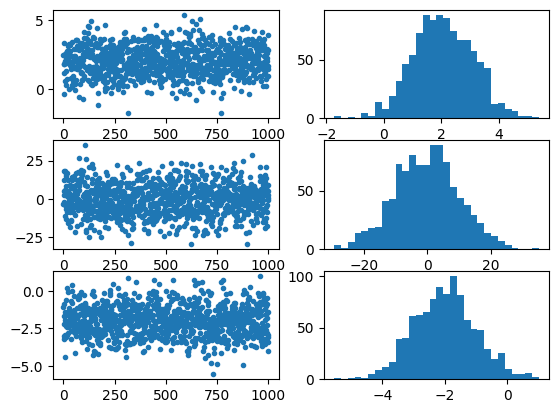

In [3]:
n = 1001
n_bins = 30

shift = lambda s, x : sum((s, x))
scale = lambda s, x : s * x

d1 = shift(2, np.random.randn(n))
d2 = scale(10, np.random.randn(n))
d3 = shift(-2, np.random.randn(n))

fig_a, ax_a = plt.subplots(nrows=3, ncols=2)

ax_a[0, 0].plot(d1, '.')
ax_a[1, 0].plot(d2, '.')
ax_a[2, 0].plot(d3, '.')

ax_a[0, 1].hist(d1, n_bins)
ax_a[1, 1].hist(d2, n_bins)
ax_a[2, 1].hist(d3, n_bins)

## +/- 1 Standard Deviation from the Mean

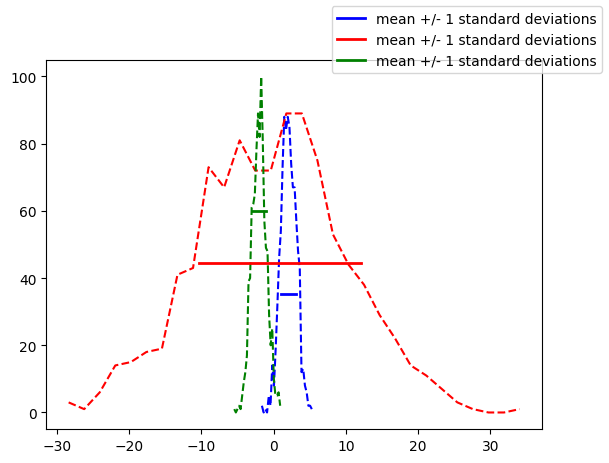

In [4]:
y1, x1 = np.histogram(d1, n_bins)
y2, x2 = np.histogram(d2, n_bins)
y3, x3 = np.histogram(d3, n_bins)

x_axis = lambda series : (series[1:] + series[:-1]) / 2

d1_mean = np.mean(d1)
d1_std = np.std(d1, ddof=1)
d2_mean = np.mean(d2)
d2_std = np.std(d2, ddof=1)
d3_mean = np.mean(d3)
d3_std = np.std(d3, ddof=1)

fig_b, ax_b = plt.subplots()

ax_b.plot(x_axis(x1), y1, 'b--')
ax_b.plot(x_axis(x2), y2, 'r--')
ax_b.plot(x_axis(x3), y3, 'g--')

ax_b.plot([d1_mean - d1_std, d1_mean + d1_std], [.4 * max(y1), .4 * max(y1)], 'b', linewidth=2, label='mean +/- 1 standard deviations')
ax_b.plot([d2_mean - d2_std, d1_mean + d2_std], [.5 * max(y2), .5 * max(y2)], 'r', linewidth=2, label='mean +/- 1 standard deviations')
ax_b.plot([d3_mean - d3_std, d3_mean + d3_std], [.6 * max(y3), .6 * max(y3)], 'g', linewidth=2, label='mean +/- 1 standard deviations')

fig_b.legend()
fig_b.show()


## Variance, Biased Variance, Standard Deviation, MAD (Mean Absolute Difference)

[[  1.10059934   4.12896357  13.99756849  12.45650139  20.75404669
   26.79906497  37.13750125  55.06766542  73.83171033 105.82656502]
 [  1.07858736   4.04638429  13.71761712  12.20737136  20.33896576
   26.26308367  36.39475122  53.96631211  72.35507613 103.71003372]
 [  1.04909454   2.03198513   3.74133245   3.52937691   4.55566095
    5.17678133   6.09405458   7.42075909   8.59253806  10.28720395]
 [  0.86924977   1.53735348   3.19351757   2.83191536   3.73685383
    4.41488114   4.82685094   5.77237165   6.80704302   8.51827795]]


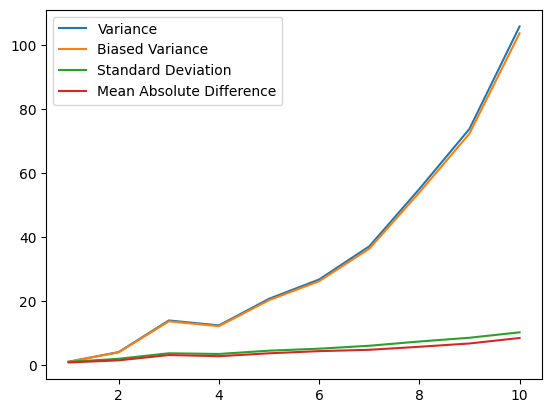

In [18]:
variances = np.arange(1, 11)
n = 50


variance_measures = np.zeros((4, len(variances)))

for i in range(len(variances)):
    samples = np.random.randn(n) * variances[i]
    samples_centered = samples - np.mean(samples)

    # Variance
    variance_measures[0, i] = sum(samples_centered**2) / (n-1)

    # "Biased" variance
    variance_measures[1, i] = sum(samples_centered**2) / n

    # Standard deviation
    variance_measures[2, i] = np.sqrt(sum(samples_centered**2) / (n-1))

    # Mean absolute difference - MAD
    variance_measures[3, i] = sum(abs(samples_centered)) / (n-1)

print(variance_measures)

plt.plot(variances, variance_measures.T)
plt.legend(('Variance', 'Biased Variance', 'Standard Deviation', 'Mean Absolute Difference'))
plt.show()